In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Función f(x)
f = lambda x: x**2 - 3*x + np.exp(x) - 2

# Devuelve un intervalo entre a y b con n subintervalos y la longitud de cada subintervalo
intervalo = lambda a, b, n : (np.linspace(a, b, n+1), (b - a) / (n+1))

In [83]:
# Divisiones
i, di = intervalo(-2, 4, 20)
fa = f(i) # Valores de f en cada punto

# Comprobar si dos valores tienen signo distinto
signo_distinto = lambda x, y: x * y < 0

# Punto inicial de cada intervalo en el que hay ceros
ceros = lambda i : i[:-1][signo_distinto(f(i)[:-1], f(i)[1:])]

c = ceros(i)

# Información sobre los intervalos
print("Ceros detectados en ({:.2f}, {:.2f}): {}".format(i[0], i[-1], len(c)))
for x0 in c:
    print(" > ({:.2f}, {:.2f})".format(x0, x0+di))

Ceros detectados en (-2.00, 4.00): 2
 > (-0.50, -0.21)
 > (1.30, 1.59)


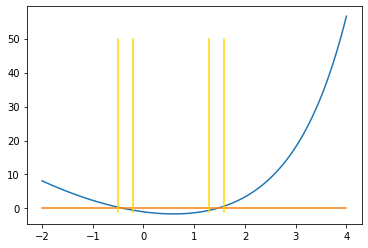

In [79]:
# Representación gráfica de la función
x = np.linspace(i[0], i[-1], 100)
y = f(x)

plt.plot(x, y) # Función
plt.plot(np.linspace(i[0], i[-1], 100), np.zeros(100)) # Eje y = 0

# Lineas para los ceros
for x0 in c:
    plt.plot(np.ones(10)*x0, np.linspace(-1, 50, 10), color="gold")
    plt.plot(np.ones(10)*(x0+di), np.linspace(-1, 50, 10), color="gold")

plt.show()

In [97]:
# Escoger la mitad del intervalo donde haya un cero
def escoger_intervalo(a, c):
    if (signo_distinto(f(a), f(c))):
        return a
    return c

def encontrar_ceros(ceros_iniciales, d_inicial, funcion_intermedio, precision):
    A = ceros_iniciales # Inicio de los subintervalos en los que hay ceros
    D = d_inicial # Tamaño de los subintervalos

    ceros = [] # Lista de ceros (inicio_intervalo, tamaño_intervalo, valor_cero)

    while len(A) > 0:
        # Actualizar lista de subintervalos
        D_ = np.ones(len(A)) * D
        C = list(map(funcion_intermedio, A, D_))
        A = list(map(escoger_intervalo, A, C))

        # Comprobar precisión
        for a in A:
            v = f(a) # f(punto_medio(a, D))
            if abs(v) < precision:
                ceros += [(a, D, v)]
                A.remove(a)

        # Dividir el tamaño de los subintervalos
        D *= 0.5

    return ceros

def print_ceros(ceros):
    for i in ceros:
        a_, d_, v_ = i
        print(" > Cero estimado en {:.6f} +/- {:.2e}, con un valor de {:.2e}".format(punto_medio(a_, d_), d_ * 0.5, v_))

In [101]:
# Bisección

# Precisión deseada
precision = 1e-10

# Funcion punto medio
punto_medio = lambda a, d: a + d * 0.5

# Ceros iniciales
i, di = intervalo(-0.5, -0.2, 20)
c = ceros(i)

# Ceros biseccion
ceros_biseccion = encontrar_ceros(c, di, punto_medio, precision)
print("Bisección, intervalo ({:.2f}, {:.2f}), precisión {:.2e}".format(i[0], i[-1], precision))
print_ceros(ceros_biseccion)

Bisección, intervalo (-0.50, -0.20), precisión 1.00e-10
 > Cero estimado en -0.390272 +/- 2.66e-11, con un valor de 3.64e-11


In [103]:
# Regula falsi

# Precisión deseada
precision = 1e-10

# Funcion punto falsi
punto_falsi = lambda a, d: a - (f(a) * (d / (f(a+d) - f(a))))

# Ceros iniciales
i, di = intervalo(-4, 2, 20)
c = ceros(i)

# Ceros falsi
ceros_falsi = encontrar_ceros(c, di, punto_falsi, precision)
print("Falsi, intervalo ({:.2f}, {:.2f}), precisión {:.2e}".format(i[0], i[-1], precision))
print_ceros(ceros_falsi)

Falsi, intervalo (-4.00, 2.00), precisión 1.00e-10
 > Cero estimado en 1.448471 +/- 2.23e-03, con un valor de -1.23e-12
 > Cero estimado en -0.390271 +/- 1.09e-06, con un valor de 5.17e-12
